In [1]:
import numpy as  np
import pandas as pd
import matplotlib
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
 

In [2]:
prdct = pd.read_csv('D:\\python sales db\\salesdb\\123.csv')
#prdct.ProductName = ord(prdct.ProductName)
#prdct.ProductName= bytearray(prdct.ProductName,'utf-8')
print(prdct.info())
print(prdct.head(5)) 
print(prdct.ndim)
print(prdct.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
ProductID      452 non-null int64
ProductName    452 non-null object
Price          452 non-null int64
CategoryID     452 non-null int64
Class          452 non-null int64
ModifyDate     452 non-null object
Resistant      452 non-null object
IsAllergic     312 non-null object
Vitality       322 non-null object
Days           178 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 35.4+ KB
None
   ProductID              ProductName  Price  CategoryID  Class ModifyDate  \
0          1          FlourWholeWheat     74        2988      3     Medium   
1          2  CookieChocolateChipWith     91        2329      3     Medium   
2          3          OnionsCippolini      9        1379      9     Medium   
3          4       SauceGravyAuJusMix     54        3055      9     Medium   
4          5      ArtichokesJerusalem     65        4771      2        Low   

  Resistant

In [3]:
prdct["ProductName"] = prdct["ProductName"].astype('category')
prdct.dtypes

ProductID         int64
ProductName    category
Price             int64
CategoryID        int64
Class             int64
ModifyDate       object
Resistant        object
IsAllergic       object
Vitality         object
Days            float64
dtype: object

In [4]:
prdct["ProductName_labled"] = prdct["ProductName"].cat.codes
prdct.head(20)

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,Vitality,Days,ProductName_labled
0,1,FlourWholeWheat,74,2988,3,Medium,21:492,Durable,NaN,NaN,154
1,2,CookieChocolateChipWith,91,2329,3,Medium,39:110,NaN,NaN,NaN,119
2,3,OnionsCippolini,9,1379,9,Medium,11:516,Weak,False,111.0,252
3,4,SauceGravyAuJusMix,54,3055,9,Medium,46:289,Durable,NaN,NaN,317
4,5,ArtichokesJerusalem,65,4771,2,Low,13:354,Durable,True,27.0,8
5,6,WineMagnottaCabSauv,79,7184,8,High,08:397,NaN,NaN,NaN,425
6,7,TableCloth53x69Colour,31,837,9,Medium,14:300,Durable,False,NaN,365
7,8,HalibutSteaks,89,8573,5,Medium,21:219,NaN,True,108.0,175
8,9,RabbitWhole,84,4219,11,Medium,12:047,Durable,NaN,NaN,300
9,10,ScampiTail,95,957,4,Low,11:460,Weak,True,105.0,327


In [5]:

df = prdct.drop(['Days','Vitality','ModifyDate', 'Resistant','Price','IsAllergic','CategoryID','ProductName','ProductID'],axis=1)
print(df.head(5))
#prdct['ProductName'].astype(float)

   Class  ProductName_labled
0      3                 154
1      3                 119
2      9                 252
3      9                 317
4      2                   8


In [6]:
X = df.drop('Class',axis=1)  
y = df['Class']  

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [29]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = svclassifier.predict(X_test)  

In [31]:
#Checking with confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[6 0 3 0 2 0 0 0 1 0 0]
 [5 0 1 0 0 0 0 0 1 0 0]
 [1 1 2 0 1 0 0 0 1 0 0]
 [3 1 0 0 0 0 3 0 1 0 3]
 [1 1 1 0 0 0 1 0 1 0 1]
 [2 0 4 0 0 1 3 0 0 1 2]
 [4 0 1 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 1 0 0 0 1]
 [4 0 2 0 0 0 0 0 1 2 1]
 [4 0 0 0 0 0 2 0 1 0 0]
 [5 1 0 1 0 0 1 0 0 0 1]]
              precision    recall  f1-score   support

           1       0.17      0.50      0.26        12
           2       0.00      0.00      0.00         7
           3       0.14      0.33      0.20         6
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6
           6       1.00      0.08      0.14        13
           7       0.08      0.14      0.11         7
           8       0.00      0.00      0.00         3
           9       0.14      0.10      0.12        10
          10       0.00      0.00      0.00         7
          11       0.11      0.11      0.11         9

   micro avg       0.13      0.13      0.13        91
   macro avg       0

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
#IMporting  crossvalidation libraires 
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# function for calculating accuracy & confusion matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test)))) 

In [34]:
print_score(svclassifier, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9806

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99        45
           2       1.00      1.00      1.00        29
           3       0.95      1.00      0.97        39
           4       1.00      0.96      0.98        24
           5       1.00      1.00      1.00        32
           6       1.00      0.83      0.90        23
           7       0.96      1.00      0.98        43
           8       1.00      0.92      0.96        25
           9       0.97      1.00      0.99        37
          10       1.00      1.00      1.00        30
          11       0.97      1.00      0.99        34

   micro avg       0.98      0.98      0.98       361
   macro avg       0.98      0.97      0.98       361
weighted avg       0.98      0.98      0.98       361


Confusion Matrix: 
 [[45  0  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

Average Accuracy: 	 0.1318
Accuracy SD: 		 0.0454


c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

Text(0.5, 1.0, 'SVM Decision Region Boundary')

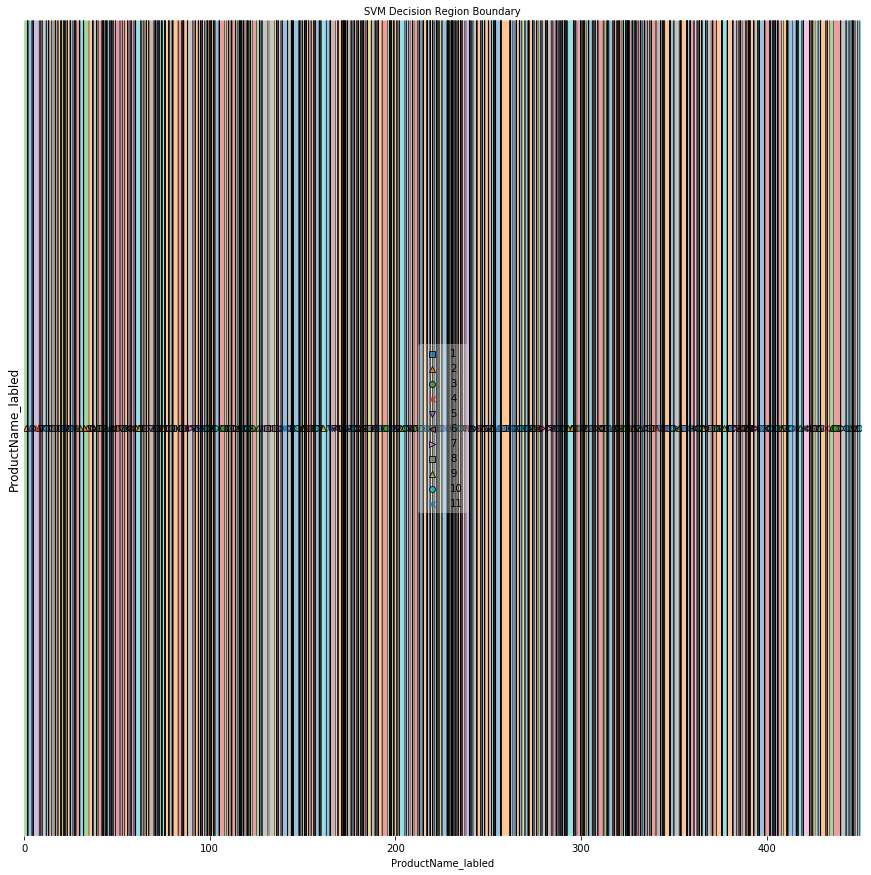

In [22]:
# Plot Decision Region using mlxtend's awesome plotting function
array_2 = np.array(y_train)
array_1 = np.array(X_train)
plot_decision_regions(X=array_1, 
                      y=array_2,
                      clf=svclassifier, 
                      legend=10)
#%pylab inline
pylab.rcParams['figure.figsize'] = (10,15)
# Update plot object with X/Y axis labels and Figure Title

plt.xlabel(X.columns[0], size=10)
plt.ylabel(X.columns[0], size=12)
plt.title('SVM Decision Region Boundary', size=10)